## 0a

In [2]:
from pathlib import Path
import os

# Grundinställning av sökvägar
local_path = Path("c:/Users/Sandra/Documents/Github/AI-Sandra-Andersson-OPA23/labs/Lab2/experiment_small_data")
train_path = local_path / "train"
val_path = local_path / "val"
test_path = local_path / "test"  # Om du har testdata

# Anpassa sökvägar för körning i Kaggle-miljö
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    kaggle_input_path = Path('/kaggle/input')
    train_path = kaggle_input_path / "train-data"
    val_path = kaggle_input_path / "val-data"
    test_path = kaggle_input_path / "test-data"  # Antagande om testdata-sökväg

# Skriv ut sökvägar för att bekräfta
print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")

Train path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Validation path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\val
Test path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\test


In [3]:
import fuzzywuzzy

## 0b

Number of files found: 1601


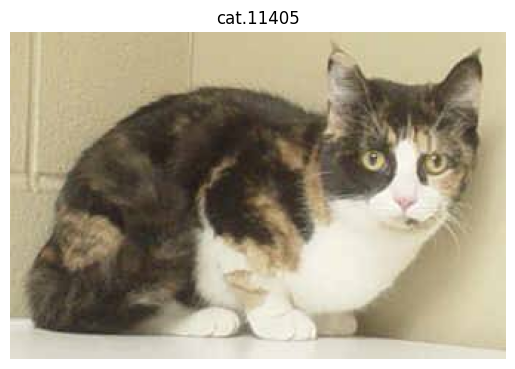

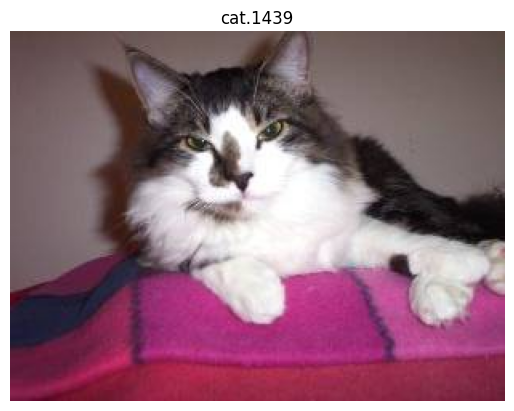

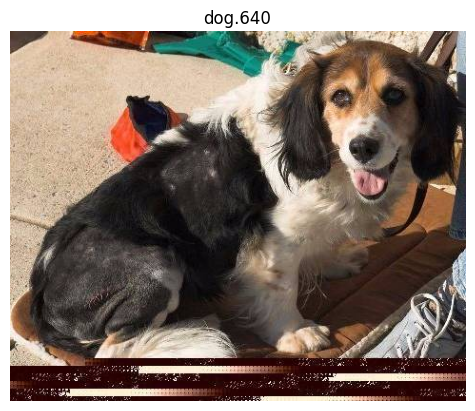

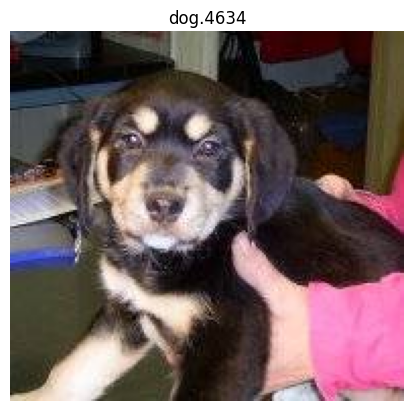

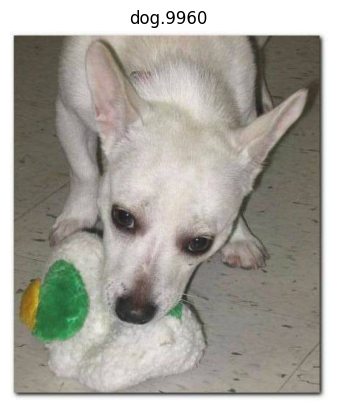

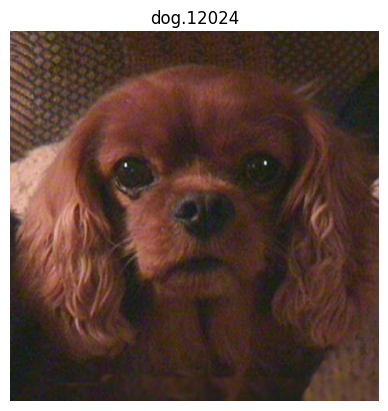

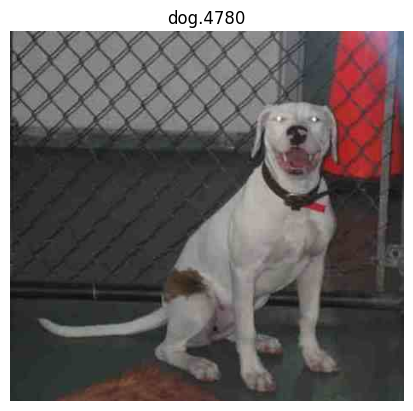

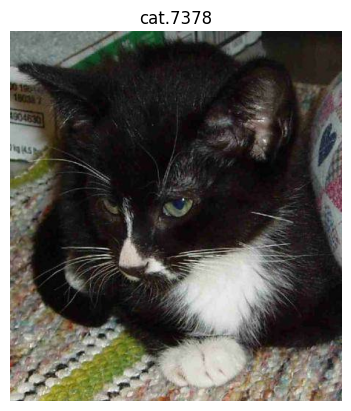

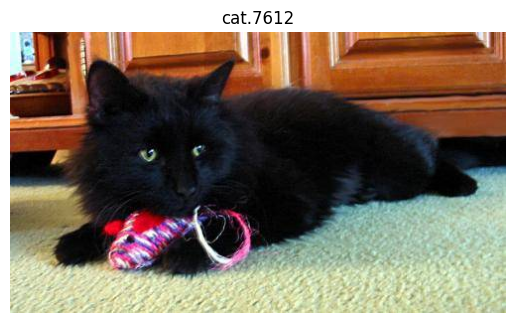

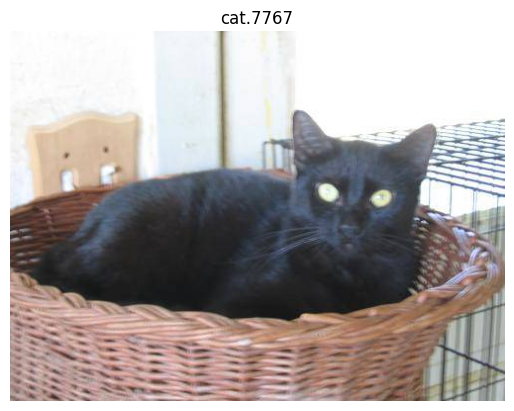

In [4]:
import random
import matplotlib.pyplot as plt

# Listar alla filer i mappen
train_files = list(train_path.glob('*'))
print(f"Number of files found: {len(train_files)}")

# Väljer slumpmässigt 10 filer från listan
random_img = random.sample(train_files, 10)

# Loopar genom de slumpmässigt valda bilderna
for image_file in random_img:
    # Läser in bilden
    image = plt.imread(image_file)
    
    # Tar fram filnamnet (label)
    label = image_file.stem
    
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()


## 0c

In [5]:
from pathlib import Path

folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
           ('experiment_tiny_data', ['test', 'train', 'val']),
           ('original_data', ['test', 'train'])]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

## 0d

In [ ]:
import shutil

# Antal exempel för varje delmängd
train_size = 1600
val_size = 400
test_size = 500

# Antal exempel för varje klass
dogs_train_size = 800
cats_train_size = 800
dogs_val_size = 200
cats_val_size = 200
dogs_test_size = 250
cats_test_size = 250

# Skapar train, val och test mappar om de inte redan finns
small_test = local_path / 'test'
small_train = local_path / 'train'
small_val = local_path / 'val'

# Listar alla bilder för hundar och katter i originaldatasetet
cat_images = list(train_path.glob('cat*.jpg'))
dog_images = list(train_path.glob('dog*.jpg'))

print(len(dog_images))
print(len(cat_images))

# Väljer slumpmässigt exemplar för varje delmängd hundar
random_dog_train = random.sample(dog_images, dogs_train_size)
random_dog_val = random.sample([img for img in dog_images if img not in random_dog_train], dogs_val_size)
random_dog_test = random.sample([img for img in dog_images if img not in random_dog_train and img not in random_dog_val], dogs_test_size)

# Väljer slumpmässigt exemplar för varje delmängd katter
random_cat_train = random.sample(cat_images, cats_train_size)
random_cat_val = random.sample([img for img in cat_images if img not in random_cat_train], cats_val_size)
random_cat_test = random.sample([img for img in cat_images if img not in random_cat_train and img not in random_cat_val], cats_test_size)

# Blandar listorna med slumpmässigt valda exempel
random.shuffle(random_dog_train)
random.shuffle(random_dog_val)
random.shuffle(random_dog_test)
random.shuffle(random_cat_train)
random.shuffle(random_cat_val)
random.shuffle(random_cat_test)

# Kopierar de slumpmässigt valda exemplaren till sina respektive delar
for img in random_dog_train:
    shutil.copy(img, small_train)
for img in random_cat_train:
    shutil.copy(img, small_train)

for img in random_dog_val:
    shutil.copy(img, small_val)
for img in random_cat_val:
    shutil.copy(img, small_val)

for img in random_dog_test:
    shutil.copy(img, small_test)
for img in random_cat_test:
    shutil.copy(img, small_test)

print("Train|val|test-split har genomförts och datan har sparats i sina respektive mappar.")


In [8]:
# Loopar igenom alla filer i mappen och skriver ut deras attribut
for file in train_path.iterdir():
    print(f"File Name: {file.name}")
    print(f"File Type: {'File' if file.is_file() else 'Directory'}")
    print(f"File Size: {file.stat().st_size} bytes")
    print(f"File Creation Time: {file.stat().st_ctime}")
    print(f"File Modification Time: {file.stat().st_mtime}")
    # Extraherar labelsvektorn från filnamnet (om den finns)
    labels_vector = file.name.split('_')[-1].split('.')[0]
    print(f"File Label Vector: {labels_vector}")

'\n# Loopar igenom alla filer i mappen och skriver ut deras attribut\nfor file in train_path.iterdir():\n    print(f"File Name: {file.name}")\n    print(f"File Type: {\'File\' if file.is_file() else \'Directory\'}")\n    print(f"File Size: {file.stat().st_size} bytes")\n    print(f"File Creation Time: {file.stat().st_ctime}")\n    print(f"File Modification Time: {file.stat().st_mtime}")\n    # Extraherar labelsvektorn från filnamnet (om den finns)\n    labels_vector = file.name.split(\'_\')[-1].split(\'.\')[0]\n    print(f"File Label Vector: {labels_vector}")\n'

## 0e

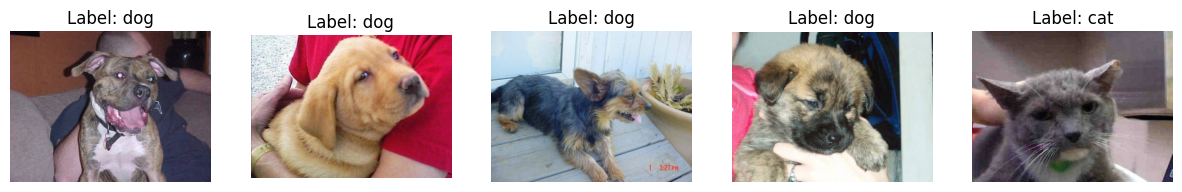

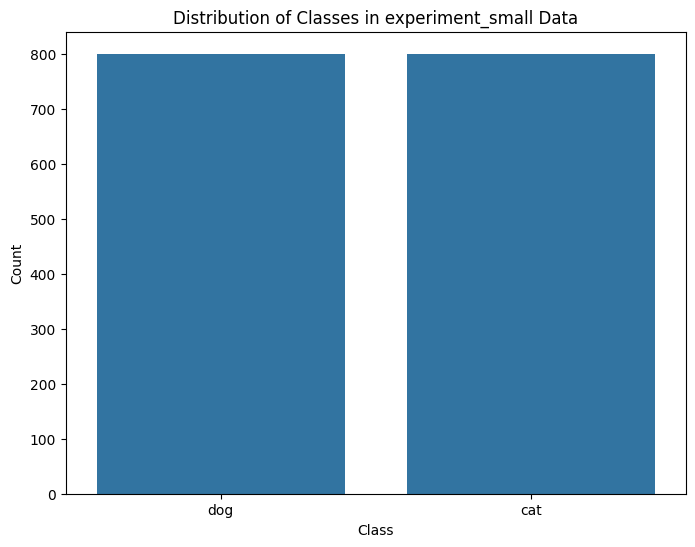

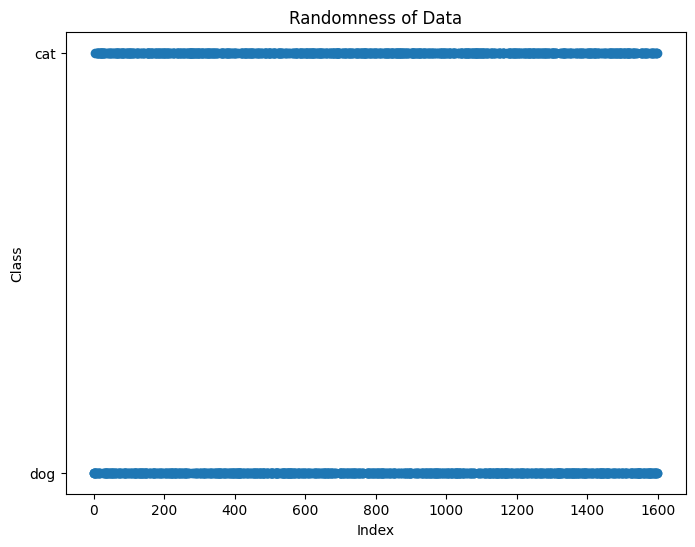

In [75]:
# Listar filer i mappen med filtillägget .jpg
image_files = list(train_path.glob('*.jpg'))

# Skapar en DataFrame med filvägarna som en kolumn
small_train_data = pd.DataFrame({'image_path': [str(file) for file in image_files]})

# Visar de första raderna i datasetet för att kontrollera att det har lästs in korrekt
# print(small_train_data.head())

# Plockar ut labelsvektorer och one-hot encodear dem med 0 och 1
# Lägger till en kolumn 'label' för att simulera datasetets struktur
small_train_data['label'] = ['cat' if 'cat' in file else 'dog' for file in small_train_data['image_path']]

# Testar ta bort enligt gpt

one_hot_encoded_labels = pd.get_dummies(small_train_data['label'])

# Lägger till de one-hot encodade labelsvektorerna till DataFramen
small_train_data = pd.concat([small_train_data, one_hot_encoded_labels], axis=1)

# Slumpmässigt samplar rader från DataFrame för att få en mer slumpmässig ordning
small_train_data = small_train_data.sample(frac=1).reset_index(drop=True)

# Plotta några bilder med deras respektive one-hot encoded labels för att kontrollera att det är korrekt
# Plottar de första 5 bilderna med deras labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (index, row) in enumerate(small_train_data.head().iterrows()):
    img = plt.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {row['label']}")
    axes[i].axis('off')
plt.show()

# Skapa lämpliga diagram för att kontrollera att dataseten är balanserad
# Plottar antalet förekomster av varje klass i datasetet
plt.figure(figsize=(8, 6))
sns.countplot(x=small_train_data['label'], data=small_train_data)
plt.title('Distribution of Classes in experiment_small Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Skapa lämpliga diagram för att kontrollera att datasetet är slumpat
# Kontrollerar fördelningen av klasser över indexet för att se om det finns något mönster
plt.figure(figsize=(8, 6))
plt.plot(small_train_data.index, small_train_data['label'], marker='o', linestyle='')
plt.title('Randomness of Data')
plt.xlabel('Index')
plt.ylabel('Class')
plt.show()


In [76]:
small_train_data.shape

(1600, 4)

In [77]:
small_train_data.head(-1)

image_path label    cat    dog
0     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
1     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
2     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
3     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
4     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   cat   True  False
...                                                 ...   ...    ...    ...
1594  c:\Users\Sandra\Documents\Github\AI-Sandra-And...   cat   True  False
1595  c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
1596  c:\Users\Sandra\Documents\Github\AI-Sandra-And...   cat   True  False
1597  c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True
1598  c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False   True

[1599 rows x 4 columns]

In [78]:
small_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1600 non-null   object
 1   label       1600 non-null   object
 2   cat         1600 non-null   bool  
 3   dog         1600 non-null   bool  
dtypes: bool(2), object(2)
memory usage: 28.3+ KB


In [79]:
small_train_data.columns

Index(['image_path', 'label', 'cat', 'dog'], dtype='object')

In [80]:
small_train_data.describe()

image_path label    cat   dog
count                                                1600  1600   1600  1600
unique                                               1600     2      2     2
top     c:\Users\Sandra\Documents\Github\AI-Sandra-And...   dog  False  True
freq                                                    1   800    800   800

In [ ]:
# # Skapar en ny DataFrame med endast kolumnerna för de one-hot-kodade klasserna
# one_hot_labels = small_train_data[['cat' = , 'dog']]

# # Konverterar DataFrame till en NumPy-array och sedan till en Python-lista
# labels_list = one_hot_labels.values.tolist()

# print(labels_list)

## 1a

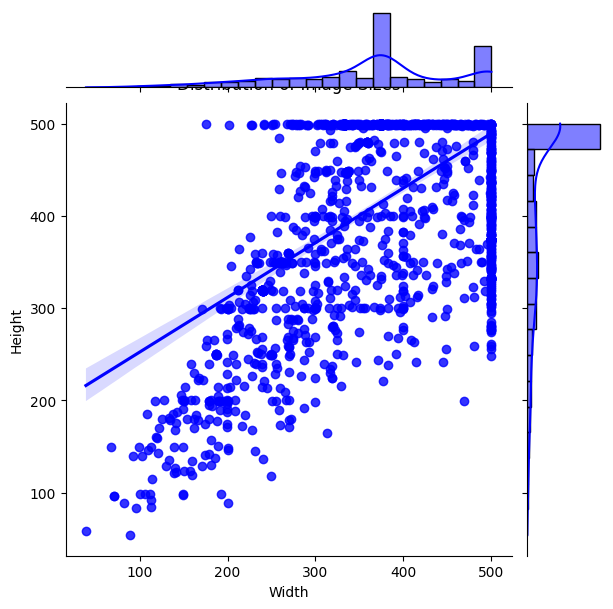

In [37]:
# Skapar en lista med tupler av bildbredd och bildhöjd
image_sizes = [(plt.imread(file).shape[0], plt.imread(file).shape[1]) for file in small_train_data['image_path']]

# Extraherar bildbredd och bildhöjd till separata listor
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Skapar en jointplot för att visualisera bildstorlekarna
sns.jointplot(x=widths, y=heights, kind='reg', color='blue')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes', pad=10)
plt.show()

## 1b och 1c

In [38]:
import cv2

def resize_images_with_labels(df, target_size=(200, 250), min_size=(50, 80)):
    resized_images = []
    labels = []
    
    for index, row in df.iterrows():
        filepath = Path(row['image_path'])
        img = cv2.imread(str(filepath))
        
        if img is not None and img.shape[0] >= min_size[1] and img.shape[1] >= min_size[0]:
            # Ändrar storleken på bilden till target_size
            resized_img = cv2.resize(img, target_size)
            # Konverterar färgkanalerna från BGR till RGB
            resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
            # Lägger till den ändrade bilden till listan med bilder
            resized_images.append(resized_img_rgb)
            # Lägger till one-hot encoded labels till listan med etiketter
            labels.append(row[['cat', 'dog']].values)
        else:
            print(f"Ignoring image {filepath.name} due to small size: {img.shape}")

    return np.array(resized_images), np.array(labels)

# Använd funktionen för att bearbeta bilder och få labels
resized_images, labels = resize_images_with_labels(small_train_data)
print(f"Total number of resized images: {len(resized_images)}")
print(f"Shape of resized images array: {resized_images.shape}")

# Sparar bilderna och etiketterna som numpy-arrayer
np.save('resized_images.npy', resized_images)
np.save('labels.npy', labels)


Ignoring image dog.7459.jpg due to small size: (71, 96, 3)
Ignoring image cat.2753.jpg due to small size: (71, 96, 3)
Ignoring image dog.5746.jpg due to small size: (68, 150, 3)
Ignoring image dog.9705.jpg due to small size: (39, 59, 3)
Total number of resized images: 1596
Shape of resized images array: (1596, 250, 200, 3)


## 1d

0.0 1.0


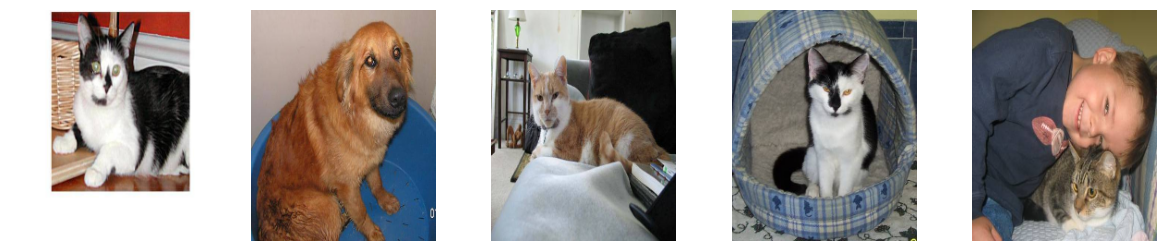

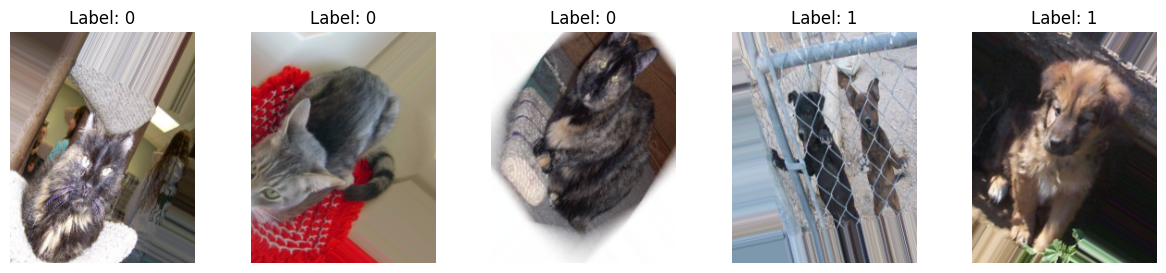

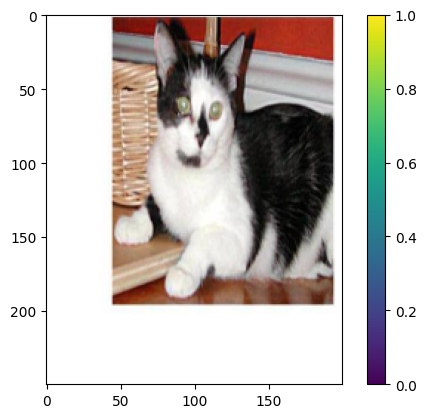

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Skala om bilderna till float32 och normalisera till intervallet [0, 1]
scaled_images = resized_images.astype('float32') / 255
print(scaled_images.min(), scaled_images.max())

# Skapa en ImageDataGenerator för augmentering med både milda och starkare inställningar
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Skapa en generator från de skaldade bilderna
image_data_generator = datagen.flow(
    scaled_images,  # Säkerställ att dessa bilder är korrekt skaldade
    labels,
    batch_size=5
)

# Visa några av de normaliserade bilderna innan augmentering
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(scaled_images[i])
    ax[i].axis('off')
plt.show()

# Visa några av de augmenterade bilderna
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    batch_images, batch_labels = next(image_data_generator)
    ax[i].imshow(np.clip(batch_images[0], 0, 1))  # Clip för att undvika fel i bildvisning
    label = np.argmax(batch_labels[0])  # Visa klassetikett baserad på one-hot encoding
    ax[i].set_title(f"Label: {label}")
    ax[i].axis('off')
plt.show()

# Visar en bild med färgskala för att förstå pixelvärden
plt.imshow(scaled_images[0])
plt.colorbar()  # Lägger till en färgskala för att se pixelvärdena
plt.show()


## 2

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


model = Sequential([
    Input(shape=(200, 250, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 124, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 122, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 85376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 85376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    43,713,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,806,785 (167.11 MB)

 Trainable params: 43,806,785 (167.11 MB)

 Non-trainable params: 0 (0.00 B)

## Utan augmentering

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def create_dataframe(image_folder):
    data = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            class_label = 'cat' if 'cat' in filename else 'dog'
            data.append({'filename': os.path.join(image_folder, filename), 'class_label': class_label})
    return pd.DataFrame(data)

train_df = create_dataframe(train_path)
val_df = create_dataframe(val_path)

train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class_label',
    target_size=(200, 250),
    class_mode='binary',
    batch_size=32
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class_label',
    target_size=(200, 250),
    class_mode='binary',
    batch_size=32
)

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


## Med augmentering

In [50]:
train_datagen = ImageDataGenerator(
    resized_images,
    rotation_range=40,           # Roterar bilderna upp till 40 grader slumpmässigt
    width_shift_range=0.2,       # Horisontell skiftning av upp till 20% av bildbredden
    height_shift_range=0.2,      # Vertikalt skiftning av upp till 20% av bildhöjden
    shear_range=0.2,             # Skärningstransformation
    zoom_range=0.2,              # Zooma in/ut i bilder
    horizontal_flip=True,        # Tillåter horisontell flipping av bilder
    fill_mode='nearest'          # Fyllningsmetod när rotationer och skift appliceras
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class_label',
    target_size=(200, 250),
    class_mode='binary',
    batch_size=32
)

# Valideringsgeneratorn fortsätter att använda bara rescaling,
# eftersom man inte vill augmentera valideringsdata.
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class_label',
    target_size=(200, 250),
    class_mode='binary',
    batch_size=32
)


Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


## Visualisera och analysera

In [70]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

'''def create_image_dataframe(image_folder):
    image_paths = list(image_folder.glob('*.jpg'))
    random.shuffle(image_paths)  # Slumpar
    data = {
        'filename': [str(path) for path in image_paths],
        'class': ['dog' if 'dog' in path.name else 'cat' for path in image_paths]
    }
    return pd.DataFrame(data)'''

'''
def load_images_and_labels(df, target_size=(200, 250)):
    X = [img_to_array(load_img(row['filename'], target_size=target_size)) for _, row in df.iterrows()]
    y = [1 if label == 'dog' else 0 for label in df['class']]
    return np.array(X) / 255.0, to_categorical(y, num_classes=2)
'''

def load_images_and_labels(df, target_size=(200, 250)):
    X = []
    y = []
    for _, row in df.iterrows():
        img = plt.imread(row['filename'])
        img_resized = cv2.resize(img, target_size)
        X.append(img_resized)
        y.append(1 if row['class'] == 'dog' else 0)
    X = np.array(X) / 255.0
    y = to_categorical(y, num_classes=2)
    return X, y

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(200, 250, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
'''
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
'''
'''history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
# Plottar träningens resultat
plot_training_history(history)
'''

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history

<function __main__.plot_training_history(history)>

In [71]:
# Läser in datan
train_df = create_dataframe(train_path)
val_df = create_dataframe(val_path)
X_train, y_train = load_images_and_labels(train_df)
X_val, y_val = load_images_and_labels(val_df)

# Bygger och tränar modellen
model = build_model()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plottar träningens resultat
plot_training_history(history)

# train_df = create_image_dataframe(train_path)
# val_df = create_image_dataframe(val_path)

# X_train, y_train = load_images_and_labels(train_df)
# X_val, y_val = load_images_and_labels(val_df)

# model = build_model()

# history = model.fit(
#     X_train, y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_val, y_val)
# )
# plot_training_history

KeyError: 'class'

In [62]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 890ms/step - accuracy: 0.8877 - loss: 0.2479 - val_accuracy: 0.6250 - val_loss: 0.9858
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 890ms/step - accuracy: 0.9321 - loss: 0.1773 - val_accuracy: 0.6125 - val_loss: 1.2558
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 886ms/step - accuracy: 0.9588 - loss: 0.1103 - val_accuracy: 0.6400 - val_loss: 1.3877
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 888ms/step - accuracy: 0.9723 - loss: 0.0872 - val_accuracy: 0.6200 - val_loss: 1.3158
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


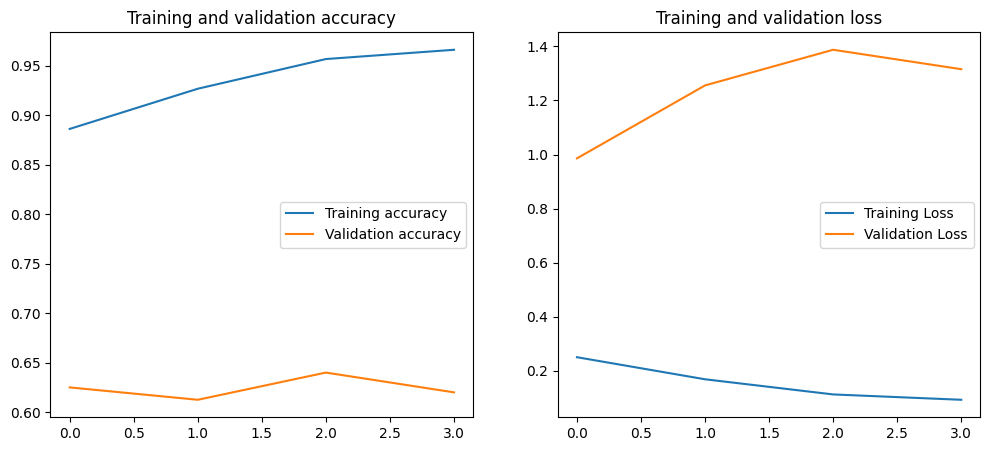

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

plot_training_history(history)


In [ ]:
#TEST
# Bygg och träna modellen utan augmentering
model_no_aug = build_model()
history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopper]  # Använd callbacks
)

# Bygg och träna modellen med augmentering
model_aug = build_model()
history_aug = model_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopper]  # Använd callbacks
)
# Plotta träningens resultat utan augmentering
plot_training_history(history_no_aug)

# Plotta träningens resultat med augmentering
plot_training_history(history_aug)

NameError: name 'train_generator_no_aug' is not defined

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 921ms/step - accuracy: 0.9232 - loss: 0.1890 - val_accuracy: 0.6375 - val_loss: 1.1903 - learning_rate: 0.0010
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 879ms/step - accuracy: 0.9581 - loss: 0.1164 - val_accuracy: 0.6275 - val_loss: 1.4222 - learning_rate: 0.0010
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.9654 - loss: 0.0878
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 873ms/step - accuracy: 0.9653 - loss: 0.0878 - val_accuracy: 0.6425 - val_loss: 1.4725 - learning_rate: 0.0010
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 925ms/step - accuracy: 0.9736 - loss: 0.0696 - val_accuracy: 0.6250 - val_loss: 1.4782 - learning_rate: 2.0000e-04
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.9775 - loss: 0.0612
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001.
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 878ms/step - accuracy: 0.9776 - loss: 0.0611 - val_acc

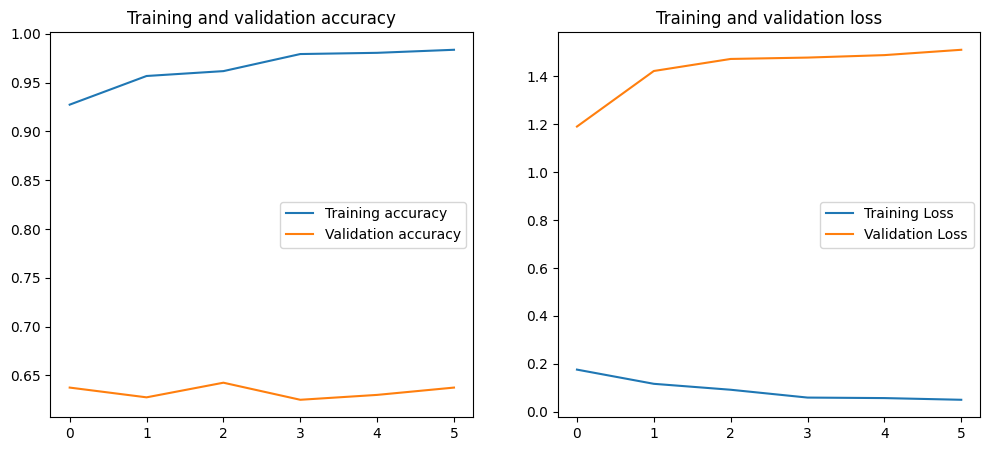

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 250, 3)),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.3),
        BatchNormalization(),
        
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.5),
        BatchNormalization(),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=0.0001)

# Model training
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper, reduce_lr]
)

plot_training_history(history)


# 2b)

    Lägg till Batch Normalization: Detta hjälper till att normalisera inputen till varje lager så att nätverket tränar snabbare och mer stabilt. Detta är särskilt användbart för djupa nätverk.

    Justera Antalet Filter och Lagers Storlek: Öka antalet filter i de konvolutionella lagren för att fånga fler detaljer från bilderna. Ändra också storleken på de dolda lagren för att testa om det kan förbättra modellens kapacitet att lära sig komplexa funktioner.

    Lägg till en Extra Konvolutionell Block: Detta kan hjälpa till att fånga ännu mer komplexa mönster i bilderna, men ökar risken för överanpassning så det bör kombineras med dropout.

    Ändra Optimizer: Testa att använda en annan optimizer som RMSprop istället för Adam för att se om det påverkar hur snabbt eller stabilt nätverket konvergerar.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

def build_modified_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(500, 400, 3)),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        
        Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Bygger och tränar det modifierade nätverket
modified_model = build_modified_model()
history_modified = modified_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)
plot_training_history(history_modified)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 737280, but received input with shape (32, 170752)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 250, 200, 3), dtype=float32)
  • training=True
  • mask=None

# 2c) Utvärdera Modellen på Testdata

Nu med en modifierad modell, måste man ladda in och förbereda testdatan på samma sätt som man gjorde med tränings- och valideringsdatan. Därefter kan man utvärdera modellen på testdata:

In [ ]:
# Förbereder testdatan
test_df = create_image_dataframe(data_root / 'experiment_small_data/test')
X_test, y_test = load_images_and_labels(test_df)

# Utvärderar modellen på testdatan
test_loss, test_accuracy = modified_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


# 2d) Sammanfattning av Forskningsartiklar och Transfer Learning

Forskning om Djupa Nätverk:

- VGG16: Forskare vid Oxford (Visual Geometry Group) utvecklade detta nätverk. Det är känt för sin djuphet och enkelhet, använder enbart 3x3 konvolutionella filter stegvis följt av max pooling. VGG16 presterade väl i ImageNet-tävlingen.

- ResNet (Residual Networks): Uppmärksammade för att introducera "residual blocks" med skip connections som tillåter tränande av mycket djupare nätverk (upp till 152 lager) genom att lösa problemet med vanishing gradients.

- Transfer Learning: Denna teknik involverar att ta en förtränad modell (som VGG16, ResNet, etc.) tränad på en stor databas som ImageNet, och sedan finjustera den för en mer specifik uppgift. Detta är effektivt eftersom de tidiga lagren av en CNN fångar universella funktioner som kanter och texturer som är användbara över olika bildigenkänningsuppgifter.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Laddar en förtränad VGG16 modell, exkluderar "toppskikten"
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(200, 250, 3)))

# Lägger till anpassade "toppskikt"
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Skapar den nya modellen
model = Model(inputs=base_model.input, outputs=predictions)

# Fryser tidigare lager
for layer in base_model.layers:
    layer.trainable = False

# Kompilerar och tränar modellen
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
